<a href="https://colab.research.google.com/github/hidasyaqiib/Fruit-Classification-/blob/main/Fruit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = r'/content/drive/MyDrive/MP1/FruitClassification'
!ls {base_dir}

test  train  validation


In [ ]:
testing_dir = os.path.join(base_dir, 'test')
training_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
fresh_dir = os.path.join(testing_dir, 'freshapples/')
rotten_dir = os.path.join(testing_dir, 'rottenapples/')

print("Jumlah data train tiap kelas")
print('Jumlah gambar fresh apples :', len(os.listdir(fresh_dir)))
print('Jumlah gambar rotten apples :', len(os.listdir(rotten_dir)))

Jumlah data train tiap kelas
Jumlah gambar fresh apples : 50
Jumlah gambar rotten apples : 50


In [ ]:
training_fresh = os.path.join(training_dir, 'freshapples/')
training_rotten = os.path.join(training_dir, 'rotten/')

validation_fresh = os.path.join(validation_dir, 'freshapples/')
validation_rotten = os.path.join(validation_dir, 'rotten/')

In [ ]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = ('nearest'),
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1,
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = ('nearest'),
    width_shift_range = 0.2,
    height_shift_range = 0.2,
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 100 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAkurasi mencapai 99%")
      self.model.stop_traing = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3,seed=112),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5,seed=112),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │       3,699,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,824,486 (14.59 MB)

 Trainable params: 3,824,486 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 6,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 1,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 760ms/step - accuracy: 0.5350 - loss: 0.8189 - val_accuracy: 0.2000 - val_loss: 0.7041
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 396ms/step - accuracy: 0.5528 - loss: 0.6780 - val_accuracy: 0.6000 - val_loss: 0.6856
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 386ms/step - accuracy: 0.4157 - loss: 0.7001 - val_accuracy: 0.7000 - val_loss: 0.6525
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.2056 - loss: 0.7268 - val_accuracy: 0.4000 - val_loss: 0.6961
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - accuracy: 0.6724 - loss: 0.6852 - val_accuracy: 0.3000 - val_loss: 0.8040
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 243ms/step - accuracy: 0.4861 - loss: 0.7214 - val_accuracy: 0.3000 - val_loss: 0.6778
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 670ms/step - accuracy: 0.3819 - loss: 0.6963 - val_accuracy: 0.5000 - val_loss: 0.6939
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.5514 - loss: 0.6534 - val_accuracy: 0.6000 - val_loss:

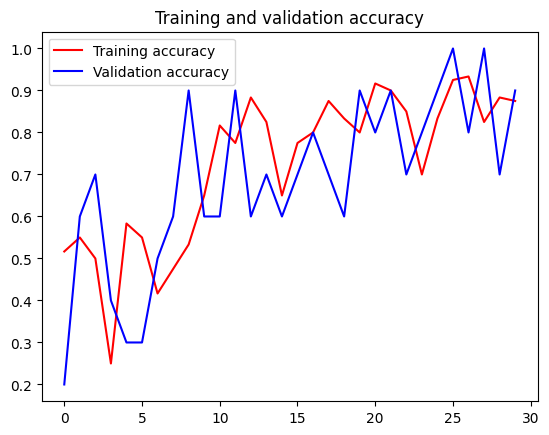

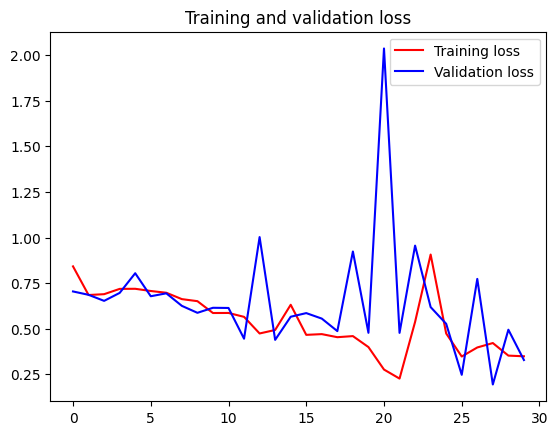

In [ ]:
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc = 'best')
plt.show()

Saving saltandpepper_Screen Shot 2018-06-08 at 5.21.35 PM.png to saltandpepper_Screen Shot 2018-06-08 at 5.21.35 PM.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
saltandpepper_Screen Shot 2018-06-08 at 5.21.35 PM.png
This image belongs to class freshapples


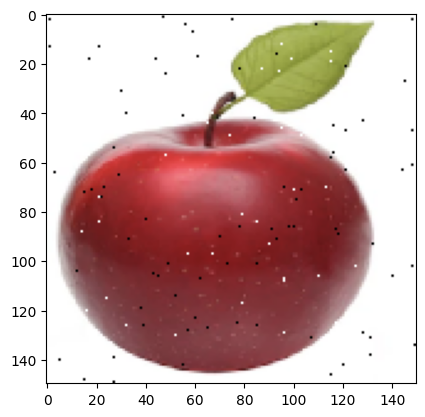

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=100)

  print(fn)

  class_list = os.listdir(training_dir)

  predicted_class_index = np.argmax(classes[0])
  print('This image belongs to class', class_list[predicted_class_index])